## Logistic Regression

### Import Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy.special import logit

%matplotlib inline

### Load data

In [2]:
# Admission data: 
# - exam 1 score (x1) 
# - exam 2 score (x2)
# - admitted (y)
data = np.loadtxt('data/LogisticRegression.csv', delimiter=',')

In [3]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data, np.array([2]))

In [4]:
# LogisticRegression estimator expect an y row vector
y = y.ravel()

### Apply Logistic Regression

In [5]:
# Use 'lbfgs' solver for logistic regression as this is what Octave fminunc does.
# Parameter C ist the inverse regularization strength (high values = low regularization).
clf = LogisticRegression(C=1e9, solver='lbfgs')
clf.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [6]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]

In [7]:
# Computes x2 at y = logit(0.5) from x1 and model parameters
# based on equation y = sigmoid(theta0 + theta1*x1 + theta2*x2)
# where logit is the inverse of sigmoid.
# (used for computing the linear decision boundary)
def x2(x1):
    return (logit(0.5) - theta0 - theta1*x1) / theta2

### Predictions

In [8]:
x1_min = X[:,0].min()
x1_max = X[:,0].max()

In [9]:
# x1 and x2 data of linear decision boundary
x1_plot = np.array([x1_min, x1_max])
x2_plot = x2(x1_plot)

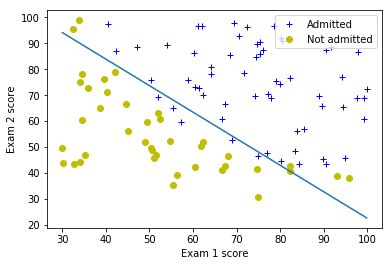

In [10]:
fig, ax = plt.subplots()
# Mask for selecting positive and negative examples
y_pos = y == 1
y_neg = y == 0

# Plot examples and decision boundary
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Admitted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Not admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(loc='upper right')

# Plot decision boundary
ax.plot(x1_plot, x2_plot)

### Predictions

In [11]:
# Classification accuracy on training set
clf.score(X, y)

0.89